# Importing libraries

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

In [ ]:
from google.colab import files
files.upload()

In [ ]:
df=pd.read_csv("/content/insurance.csv")

# Preprocessing

In [6]:
encode=LabelEncoder()

In [7]:
df["sex"]=encode.fit_transform(df["sex"])
df["smoker"]=encode.fit_transform(df["smoker"])
df["region"]=encode.fit_transform(df["region"])

In [8]:
df=df[df["charges"]<50000]

In [9]:
df=df[df["bmi"]<47]

In [10]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3)
labels=gm.fit_predict(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


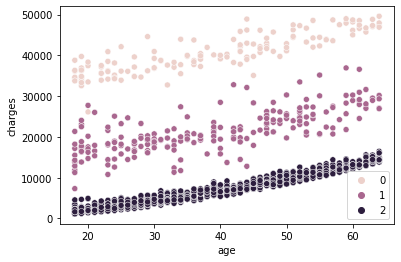

In [11]:
sns.scatterplot(df["age"],df["charges"],hue=labels)

In [12]:
df["labels"]=labels

In [13]:
group1=df[df["labels"]==2]
group2=df[df["labels"]==0]
group3=df[df["labels"]==1]

In [14]:
group1=group1.drop("labels",axis=1)
group2=group2.drop("labels",axis=1)
group3=group3.drop("labels",axis=1)

In [15]:
print(group1.shape)
print(group2.shape)
print(group3.shape)

(959, 7)
(141, 7)
(223, 7)


In [16]:
group2=group2[(group2["charges"]<34900) & (group2["charges"]>10000)]

In [17]:
x=group1.drop("charges",axis=1)
y=group1["charges"]

xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y)

x=group2.drop("charges",axis=1)
y=group2["charges"]

xtrain2,xtest2,ytrain2,ytest2=train_test_split(x,y)

x=group3.drop("charges",axis=1)
y=group3["charges"]

xtrain3,xtest3,ytrain3,ytest3=train_test_split(x,y)

In [42]:
es=EarlyStopping(patience=20)

In [59]:
def Model(t,n, xtrain, ytrain):
  model= Sequential()

  model.add(Dense(16, activation="relu"))
  model.add(Dense(32, activation="relu"))
  model.add(Dense(16, activation="relu"))
  model.add(Dense(1))

  model.compile(loss="mse", optimizer="adam", metrics=["mae"])

  model.fit(xtrain,ytrain, validation_split=.1, callbacks=EarlyStopping(patience=n), epochs=1500, verbose=False)
  hist=pd.DataFrame(model.history.history)

  print("======Model plot======")

  hist[["mae", "val_mae"]].plot()

  model.save(str(t)+".h5")

======Model plot======


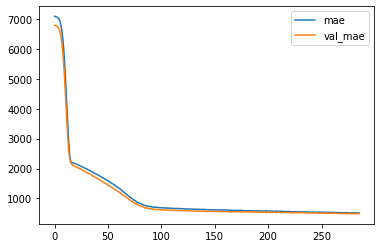

In [60]:
Model(1,10,xtrain1,ytrain1)

In [61]:
model1=load_model("1.h5")

In [62]:
prediction1=model1.predict(xtest1)

In [63]:
mean_absolute_error(prediction1, ytest1)

483.1457908129882

======Model plot======


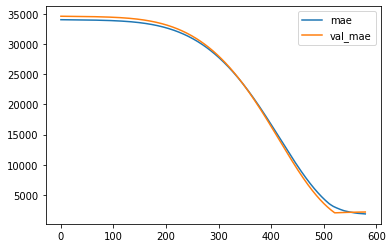

In [65]:
Model(2,13,xtrain2,ytrain2)

In [67]:
model2=load_model("2.h5")

In [68]:
prediction2=model2.predict(xtest2)

In [69]:
mean_absolute_error(prediction2, ytest2)

1518.2291885000006

======Model plot======


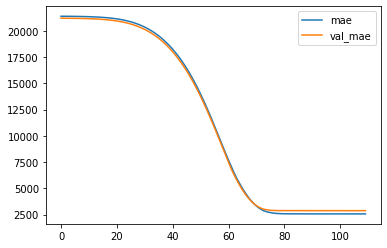

In [70]:
Model(3,13,xtrain3,ytrain3)

In [71]:
model3=load_model("3.h5")

In [72]:
prediction3=model3.predict(xtest3)

In [73]:
mean_absolute_error(prediction3, ytest3)

2045.7991003749999